In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("13-car_evaluation.csv")

In [3]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [5]:
df.columns = col_names

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in df.columns:
    print (df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [9]:
df["doors"].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [10]:
df["doors"] = df["doors"].replace("5more","5")

In [11]:
df["doors"] =df["doors"].astype(int)

In [12]:
df["persons"].unique()

array(['2', '4', 'more'], dtype=object)

In [13]:
df["persons"] = df["persons"].replace("more","5")

In [14]:
df["persons"] =df["persons"].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [16]:
X = df.drop("class", axis=1)
y = df["class"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) 

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
categorical_cols = ["buying","maint", "lug_boot", "safety"]
numerical_cols = ["doors", "persons"]

In [20]:
ordinal_encoder = OrdinalEncoder(categories=[
    ["low","med","high","vhigh"], #buying
    ["low","med","high","vhigh"], #maint
    ["small", "med", "big"], #lug_boot
    ["low", "med", "high"] #safety
])
preprocessor = ColumnTransformer(transformers=[
    ("transformation_name", ordinal_encoder, categorical_cols)
],   remainder= "passthrough")

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)


In [21]:
for col in categorical_cols:
    print (df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64


In [22]:
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5
0,0.0,3.0,1.0,1.0,3.0,2.0
1,0.0,2.0,1.0,1.0,5.0,4.0
2,0.0,2.0,0.0,1.0,3.0,4.0
3,0.0,3.0,2.0,2.0,2.0,5.0
4,1.0,0.0,2.0,1.0,3.0,5.0
...,...,...,...,...,...,...
1203,2.0,1.0,0.0,2.0,2.0,5.0
1204,3.0,2.0,1.0,1.0,3.0,5.0
1205,3.0,0.0,2.0,1.0,4.0,2.0
1206,2.0,2.0,2.0,1.0,5.0,5.0


In [23]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)
tree_model.fit(X_train_trans, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_pred = tree_model.predict(X_test_trans)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test,y_pred)
print("score: ", score)
print(classification_report(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))


score:  0.7861271676300579
              precision    recall  f1-score   support

         acc       0.54      0.51      0.53       121
        good       0.00      0.00      0.00        21
       unacc       0.85      0.97      0.91       356
       vgood       0.00      0.00      0.00        21

    accuracy                           0.79       519
   macro avg       0.35      0.37      0.36       519
weighted avg       0.71      0.79      0.75       519

confusion matrix: 
 [[ 62   0  59   0]
 [ 21   0   0   0]
 [ 10   0 346   0]
 [ 21   0   0   0]]


C:\Users\irm\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\irm\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\irm\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


[Text(0.3333333333333333, 0.875, 'x[5] <= 3.0\ngini = 0.451\nsamples = 1208\nvalue = [263, 48, 853, 44]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 409\nvalue = [0, 0, 409, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 0.5\ngini = 0.576\nsamples = 799\nvalue = [263, 48, 444, 44]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 269\nvalue = [0, 0, 269, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\ngini = 0.63\nsamples = 530\nvalue = [263, 48, 175, 44]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 270\nvalue = [142, 48, 36, 44]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.498\nsamples = 260\nvalue = [121, 0, 139, 0]')]

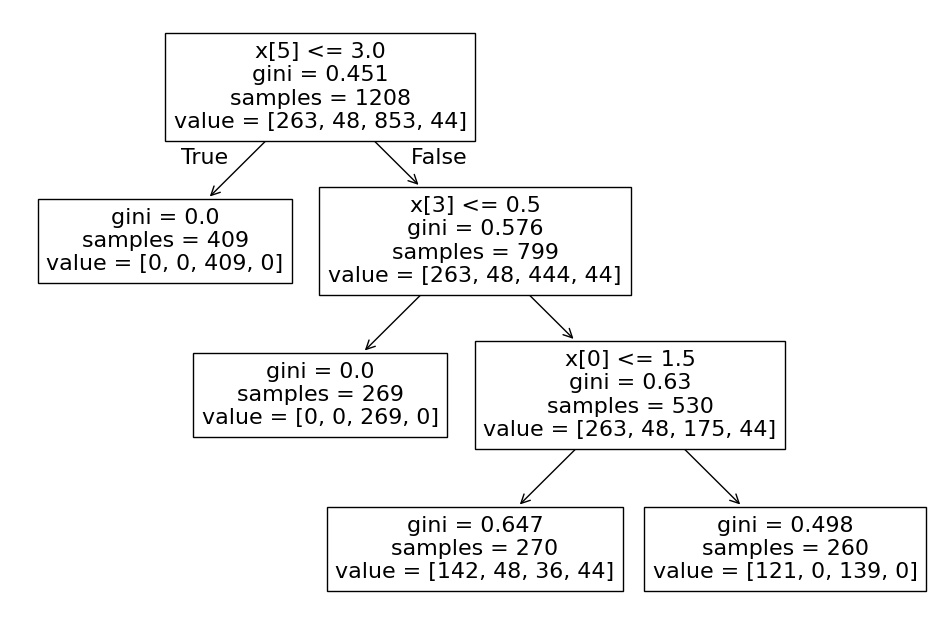

In [26]:
plt.figure(figsize=(12,8) )

from sklearn import tree
tree.plot_tree(tree_model.fit(X_train_trans, y_train))

In [27]:
# hyperpremeter

In [28]:
param = {
    "criterion" : ["gini","entropy","log_loss"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4,5,15,None],
    "max_features" : ["sqrt", "log2", None]    
}

In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=param , cv=5, scoring="accuracy")

In [30]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train_trans, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [31]:
y_pred = grid.predict(X_test_trans)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test,y_pred)
print("score: ", score)
print(classification_report(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))


score:  0.9730250481695568
              precision    recall  f1-score   support

         acc       0.91      0.98      0.94       121
        good       1.00      0.86      0.92        21
       unacc       1.00      0.97      0.99       356
       vgood       0.95      1.00      0.98        21

    accuracy                           0.97       519
   macro avg       0.97      0.95      0.96       519
weighted avg       0.97      0.97      0.97       519

confusion matrix: 
 [[119   0   1   1]
 [  3  18   0   0]
 [  9   0 347   0]
 [  0   0   0  21]]


In [33]:
df_new = pd.read_csv("11-iris.csv")

In [34]:
X = df_new.drop(["Id", "Species"], axis=1)
y = df_new["Species"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) 

In [36]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3181818181818182, 0.9285714285714286, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.22727272727272727, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2727272727272727, 0.8571428571428572, 'True  '),
 Text(0.4090909090909091, 0.7857142857142857, 'PetalLengthCm <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.36363636363636365, 0.8571428571428572, '  False'),
 Text(0.18181818181818182, 0.6428571428571429, 'PetalWidthCm <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.09090909090909091, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.6428571428571429, 'PetalWidthCm <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.45454545454545453, 0.5, 'PetalLengthCm <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.36363636363636365, 0.3571428571428571

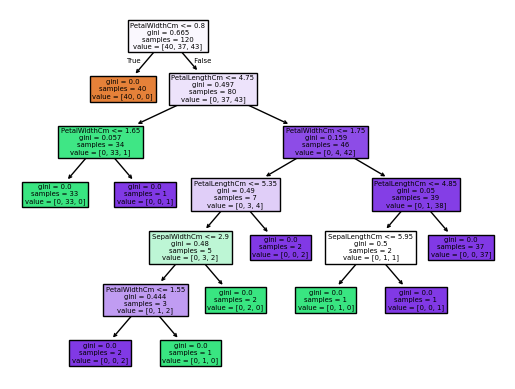

In [37]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns, filled=True)

In [38]:
y_pred =  tree_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("score: ", score)
print(classification_report(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))


score:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30

confusion matrix: 
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


In [42]:
# pruning(budama) yapıyoruz
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.375, 0.875, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'PetalLengthCm <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'PetalWidthCm <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'PetalWidthCm <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(0.625, 0.125, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.875, 0.125, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

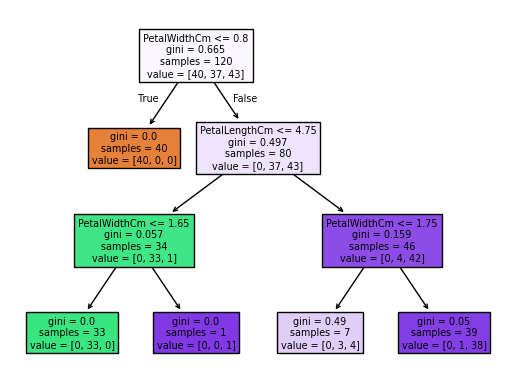

In [43]:
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns, filled=True)

In [44]:
y_pred =  tree_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print("score: ", score)
print(classification_report(y_test,y_pred))
print("confusion matrix: \n", confusion_matrix(y_test,y_pred))


score:  0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30

confusion matrix: 
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
